In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('pricerunner_aggregate.csv')
data.head()

,1,apple iphone 8 plus 64gb silver,1.1,1.2,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
0,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [2]:
data = data.drop(data.iloc[:, 0:1], 1)

In [3]:
from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)
data.head()

,apple iphone 8 plus 64gb silver,1.1,1.2,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
0,2559,1,0,909,0,7
1,2655,2,0,909,0,7
2,2562,3,0,909,0,7
3,2564,4,0,909,0,7
4,2564,5,0,909,0,7


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

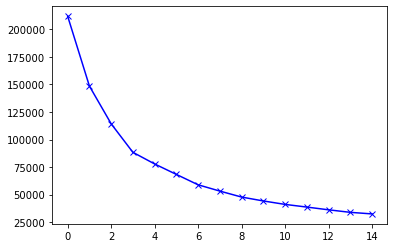

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 16):
    kmeans = KMeans(i, n_init=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.show()

In [6]:
kmeans = KMeans(6)
Y_kmeans = kmeans.fit_predict(data)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(data)

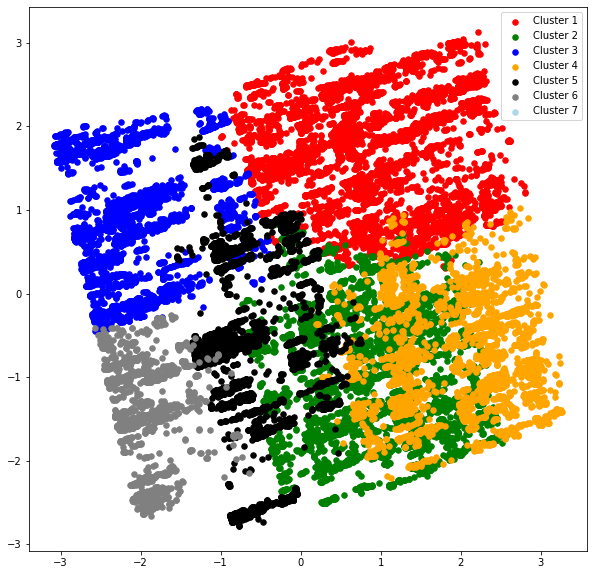

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y_kmeans==0, 0], x[Y_kmeans==0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[Y_kmeans==1, 0], x[Y_kmeans==1, 1], s=30, c='green', label='Cluster 2')
plt.scatter(x[Y_kmeans==2, 0], x[Y_kmeans==2, 1], s=30, c='blue', label='Cluster 3')
plt.scatter(x[Y_kmeans==3, 0], x[Y_kmeans==3, 1], s=30, c='orange', label='Cluster 4')
plt.scatter(x[Y_kmeans==4, 0], x[Y_kmeans==4, 1], s=30, c='black', label='Cluster 5')
plt.scatter(x[Y_kmeans==5, 0], x[Y_kmeans==5, 1], s=30, c='grey', label='Cluster 6')
plt.scatter(x[Y_kmeans==6, 0], x[Y_kmeans==6, 1], s=30, c='lightblue', label='Cluster 7')
plt.legend()
plt.show()
